<head>
    <style>
        h1{
            color: red ;
        }
    </style>
</head>

# Introduction : 
<p>Import des librairies nécessaires pour faire le TP</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import datetime
import threading
import time
import math
%matplotlib inline

# Question 1 :
<p> Combien faut-il acheter de boîtes de céréales en moyenne
pour avoir la collection complète des joueurs ? (on, suppose bien
entendu que l’on a la même probabilité d’obtenir chacune des
images dans chaque paquet de céréales</p>

<p> <a href="https://www.ilemaths.net/sujet-le-collectionneur-469931.html">Lien</a> pour aider à la démonstration de la formule a utilisé. </p>

In [2]:
def moyenneObtenirTouteLesCartes(n):
    """
    Fonction qui calcule combien il faut acheter de boîtes en moyenne pour obtenir toutes les cartes.
    n représente le nombre de cartes qu'il y a obtenir
    k représente le nombre de cartes que l'on possède 
    """
    k=1
    somme1k = 0
    moyenne = 0 # Nombre de boite que l'on doit acheter en moyenne
    while k<=n:
        somme1k+=(1/k)
        k+=1
    moyenne = n*somme1k
    # Une fois que l'on possède le nombre moyen de boîtes qu'il faut acheter il faut arrondir par excès.
    # Car la moyenne et un nombre réel et que le nombre de boîtes est entier.
    # Renvoie le nombre de boîtes qu'il faut acheter en moyenne
    return math.ceil(moyenne)
print("Le nombre de boîtes qu'il faut acheter en moyenne pour avoir toutes les cartes est ",
      moyenneObtenirTouteLesCartes(11))
    

Le nombre de boîtes qu'il faut acheter en moyenne pour avoir toutes les cartes est  34


# Question 2 : 
<p> Développer une fonction qui réalise N tests. </p>

In [3]:
# Pour simplifier on ne donne pas de nom aux cartes mais on leur donne un numéro entre 0 et 10
def Ntests(N):
    tirage = np.random.randint(0,11,N)
    return tirage

In [4]:
N = 50
experience = Ntests(N)
print(experience)

[10  0  2  8  6  2  5  7  5  0  2  1  8  7  5  9  1  9  4  5  2  4  0  4
  5  9  2  0 10 10  1  9  5 10  0  6  0  5  7  8  9  6  5  1 10  4  9  1
  0  9]


# Question 3 :
<p>Réaliser un frame composé de la date de test et du nombre
de tirage.</p>

In [5]:
date = datetime.datetime.now()
df1 = pd.DataFrame(data={'Date':[date],'Nombre de tirage':[N]})
print(df1)

                        Date  Nombre de tirage
0 2021-09-14 11:08:13.566919                50


In [6]:
def dataframeDateEtTest(N):
    i=0
    date = [] #Liste des dates
    tirage = [] #Liste des nombre tiré
    while i<N:
        date.append(datetime.datetime.now())
        tirage.append(random.randint(0,10))
        i+=1
    df = pd.DataFrame(data={"Date":date,'Tirage':tirage})
    return df

# Question 4 : 
<p>Afficher la structure du frame.</p>

In [7]:
frame = dataframeDateEtTest(50)
print(frame)

                         Date  Tirage
0  2021-09-14 11:08:13.597593       2
1  2021-09-14 11:08:13.597593      10
2  2021-09-14 11:08:13.597593       9
3  2021-09-14 11:08:13.597593       7
4  2021-09-14 11:08:13.597593       7
5  2021-09-14 11:08:13.597593       8
6  2021-09-14 11:08:13.597593       6
7  2021-09-14 11:08:13.597593      10
8  2021-09-14 11:08:13.597593       9
9  2021-09-14 11:08:13.597593       3
10 2021-09-14 11:08:13.597593       5
11 2021-09-14 11:08:13.597593      10
12 2021-09-14 11:08:13.597593       4
13 2021-09-14 11:08:13.597593      10
14 2021-09-14 11:08:13.597593       9
15 2021-09-14 11:08:13.597593       1
16 2021-09-14 11:08:13.597593       4
17 2021-09-14 11:08:13.597593       2
18 2021-09-14 11:08:13.597593       6
19 2021-09-14 11:08:13.597593       4
20 2021-09-14 11:08:13.597593      10
21 2021-09-14 11:08:13.597593       0
22 2021-09-14 11:08:13.597593       5
23 2021-09-14 11:08:13.597593       7
24 2021-09-14 11:08:13.597593       6
25 2021-09-1

# Question 5 : 
<p> Afficher la courbe des tirages.</p>

In [8]:
NombreDeValeur = frame['Tirage'].value_counts()
print(NombreDeValeur)

10    9
4     6
9     6
0     5
6     5
2     4
5     4
7     4
8     3
1     2
3     2
Name: Tirage, dtype: int64


In [9]:
NombreDeValeur = NombreDeValeur.sort_index()
print(NombreDeValeur)

0     5
1     2
2     4
3     2
4     6
5     4
6     5
7     4
8     3
9     6
10    9
Name: Tirage, dtype: int64


In [10]:
X = list(range(1,NombreDeValeur.shape[0]+1))
X

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

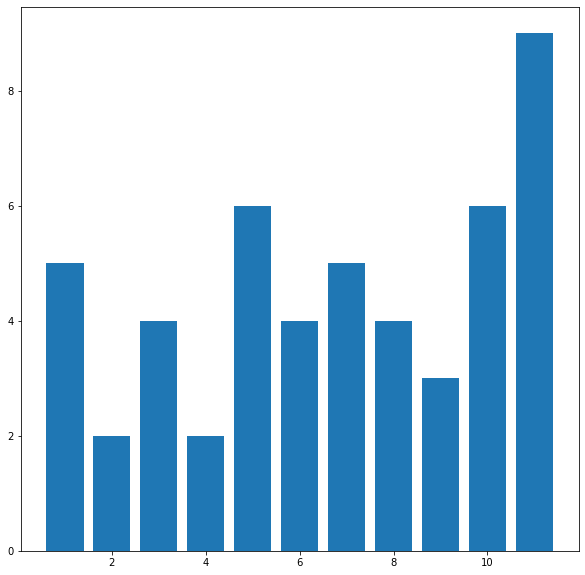

In [11]:
plt.figure(figsize=(10,10))
plt.bar(X,NombreDeValeur)
plt.show() # Tracer

# Question 6 : 
<p>  Exporter le frame dans un fichier excel</p>

In [12]:
frame.to_excel("TP1_py.xlsx")